<a href="https://colab.research.google.com/github/woodstone10/fundamental-ml-dl-study/blob/main/clustering_KMeans_vs_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make Moons clustering - K-Means vs. DBSCAN 

---
Scikit-learn datasets make_moons (DBSCAN clustering using two different neighborhood radiuses)

DBSCAN gets the clustering, which looks perfect.
Whereas, K-Means does not get proper clustering in this case


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

## K-Means

K-Means clustering algorithm
- input: k is the number of clusters to predict k, X is train data, c is cluster name

Let’s train a K-Means clusterer on this dataset.
It will try to find each blob’s center and
assign each instance to the closest blob:

In [ ]:
def KMeans_(k, X, c):
    model = KMeans(n_clusters=k)
    model.fit(X)  # fitting the model to X
    centroids = model.cluster_centers_  # We can also take a look at the k centroids that the algorithm found:
    print(centroids)
    model.predict(X)  # predicting labels (y)
    df[c] = model.labels_
    print(df.head(10))

## DBSCAN

DBSCAN clustering algorithm
- input: e is epsilon, m is min_samples, X is train data, c is cluster name
    
For each instance, the algorithm counts how many instances are located within a
small distance ε (epsilon) from it. This region is called the instance’s ε-
neighborhood.
If an instance has at least min_samples instances in its ε-neighborhood (includ‐
ing itself), then it is considered a core instance. In other words, core instances are
those that are located in dense regions.

In [ ]:
def DBSCAN_(e, m, X, c):
    model = DBSCAN(eps=e, min_samples=m)
    model.fit(X)
    model.fit_predict(X)
    df[c] = model.labels_
    print(df.head(10))

In [ ]:
x, y = make_moons(n_samples=1000, noise=0.05)
df = pd.DataFrame(columns=['x','y'])
for i in range(len(x)):
    df.loc[i] = [x[i,0], x[i,1]]
X = df.values

No handles with labels found to put in legend.


[[-0.19316474  0.56753632]
 [ 1.21204174 -0.07424264]]
          x         y  K-Means  DBSCAN
0  0.988606  0.079823        1       0
1  1.372760 -0.439872        1       1
2  0.689018  0.738472        0       0
3  0.102167  0.074389        0       1
4  1.981305  0.058995        1       1
5  0.034924  0.454513        0       1
6  0.844539  0.350045        1       0
7 -0.536188  0.802185        0       0
8 -0.906187  0.156522        0       0
9  1.102083 -0.474429        1       1
          x         y  K-Means  DBSCAN
0  0.988606  0.079823        1       0
1  1.372760 -0.439872        1       1
2  0.689018  0.738472        0       0
3  0.102167  0.074389        0       1
4  1.981305  0.058995        1       1
5  0.034924  0.454513        0       1
6  0.844539  0.350045        1       0
7 -0.536188  0.802185        0       0
8 -0.906187  0.156522        0       0
9  1.102083 -0.474429        1       1


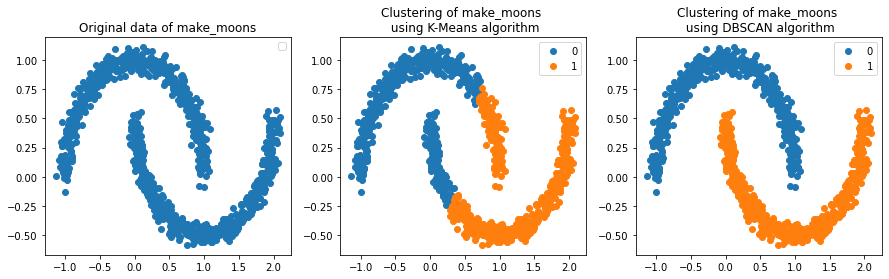

In [ ]:
KMeans_(2, X, 'K-Means')
DBSCAN_(0.2, 5, X, 'DBSCAN')

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(x[:,0],x[:,1])
plt.legend()
plt.title("Original data of make_moons")
plt.subplot(1,3,2)
for name, group in df.groupby("K-Means"):
    plt.plot(group["x"], group["y"], marker="o", linestyle="", label=name)
plt.legend()
plt.title("Clustering of make_moons \n using K-Means algorithm")
plt.subplot(1,3,3)
for name, group in df.groupby("DBSCAN"):
    plt.plot(group["x"], group["y"], marker="o", linestyle="", label=name)
plt.legend()
plt.title("Clustering of make_moons \n using DBSCAN algorithm")
plt.show()